In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
denis = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\Denis_Mukwege.jpg")
nadia = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\Nadia_Murad.jpg")
group_pic = cv2.imread(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\solvay_conference.jpg")

In [3]:
denis = cv2.cvtColor(denis, cv2.COLOR_BGR2GRAY)
nadia = cv2.cvtColor(nadia, cv2.COLOR_BGR2GRAY)
group_pic = cv2.cvtColor(group_pic, cv2.COLOR_BGR2GRAY)

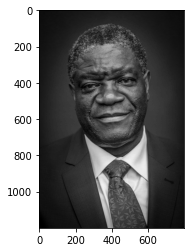

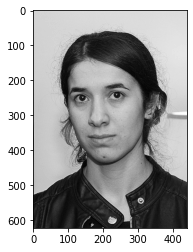

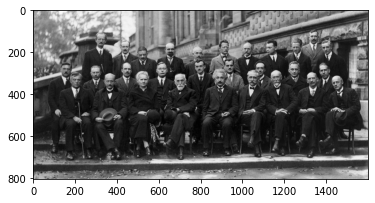

In [4]:
for i in [denis, nadia, group_pic]:
    plt.imshow(i, cmap = 'gray')
    plt.show()

In [5]:
face_cascade = cv2.CascadeClassifier(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml")

In [6]:
def detect_face(img):
    img_cpy = img.copy()
    face_rect = face_cascade.detectMultiScale(img_cpy, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in face_rect:
        cv2.rectangle(img_cpy, pt1 = (x,y), pt2 = (x+w, y+h), color = (255,255,255), thickness = 5)
        
    return img_cpy

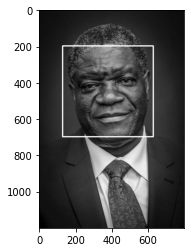

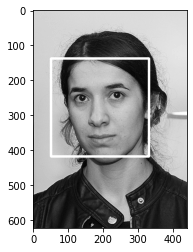

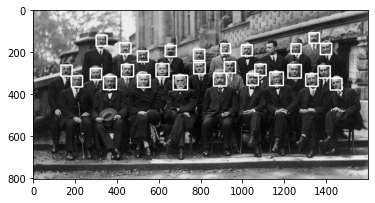

In [7]:
for i in [denis, nadia, group_pic]:
    plt.imshow(detect_face(i), cmap = 'gray')
    plt.show()

In [8]:
eye_cascade = cv2.CascadeClassifier(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_eye.xml")

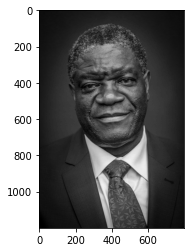

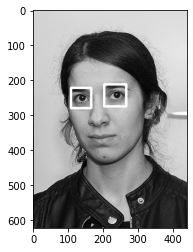

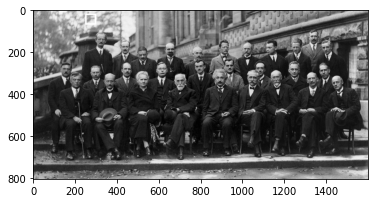

In [9]:
def detect_eyes(img):
    img_cpy = img.copy()
    face_rect = eye_cascade.detectMultiScale(img_cpy, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in face_rect:
        cv2.rectangle(img_cpy, pt1 = (x,y), pt2 = (x+w, y+h), color = (255,255,255), thickness = 5)
        
    return img_cpy

for i in [denis, nadia, group_pic]:
    plt.imshow(detect_eyes(i), cmap = 'gray')
    plt.show()

# Detect Face from Video Feed

In [10]:
import cv2
cap = cv2.VideoCapture(0) # video capture object
while True:
    ret, frame = cap.read(0) # capture the frame
    frame = detect_face(frame)
    cv2.imshow('frame',frame) # show the video feed that is being captured. Videos are just images played in a sequence
    if cv2.waitKey(1) & 0xFF == 27: # break mechanism
        break
cap.release() # release the capture obj        
cv2.destroyAllWindows()

# Detect eyes from Video Feed

In [11]:
import cv2
cap = cv2.VideoCapture(0) # video capture object
while True:
    ret, frame = cap.read(0) # capture the frame
    frame = detect_eyes(frame)
    cv2.imshow('frame',frame) # show the video feed that is being captured. Videos are just images played in a sequence
    if cv2.waitKey(1) & 0xFF == 27: # break mechanism
        break
cap.release() # release the capture obj        
cv2.destroyAllWindows()

# Blur Russian Number Plates

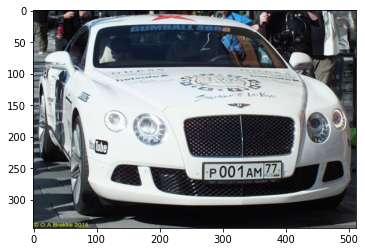

In [28]:
num_plate = cv2.imread(r"C:\Users\bishw\OneDrive\Pictures\unnamed.jpg")
num_plate = cv2.cvtColor(num_plate, cv2.COLOR_BGR2RGB)
plt.imshow(num_plate, cmap = 'gray')

In [29]:
num_plate_cascade = cv2.CascadeClassifier(r"E:\Course\Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_licence_plate_rus_16stages.xml")

In [42]:
def num_plate_detector(img):
    img_cpy = img.copy()
    num_plate_ = num_plate_cascade.detectMultiScale(img_cpy)
    kernel = np.ones((5,5),np.float32)/25
    for (x,y,w,h) in num_plate_:
#         cv2.rectangle(img_cpy, (x,y), (x+w, y+h), (0,255,0), thickness = 1)
        
        crop_img = img_cpy[y:y+h,x:x+w]
    dst = cv2.filter2D(crop_img,-1,kernel)
    img_cpy[y:y+h, x:x+w] = dst
    return img_cpy

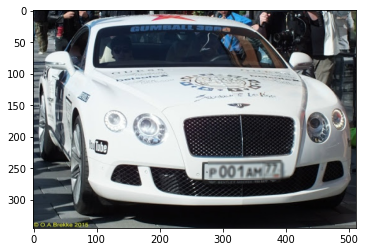

In [43]:
plt.imshow(num_plate_detector(num_plate), cmap = 'gray')

In [47]:
def num_plate_detector(img):
    img_cpy = img.copy()
    num_plate_ = num_plate_cascade.detectMultiScale(img_cpy)
#     kernel = np.ones((5,5),np.float32)/25
    for (x,y,w,h) in num_plate_:
        cv2.rectangle(img_cpy, (x,y), (x+w, y+h), (0,255,0), thickness = 1)
        
#         crop_img = img_cpy[y:y+h,x:x+w]
#     dst = cv2.filter2D(crop_img,-1,kernel)
#     img_cpy[y:y+h, x:x+w] = dst
    return img_cpy

In [58]:
def num_plate_detector(img):
    img_cpy = img.copy()
    num_plate_ = num_plate_cascade.detectMultiScale(img_cpy)
    kernel = np.ones((5,5),np.float32)/25
    for (x,y,w,h) in num_plate_:
        cv2.rectangle(img_cpy, (x,y), (x+w, y+h), (0,255,0), thickness = 1)
        crop_img = img_cpy[y:y+h,x:x+w]
        dst = cv2.filter2D(crop_img,-1,kernel)
    img_cpy[y:y+h, x:x+w] = dst
    return img_cpy

In [61]:
import cv2
cap = cv2.VideoCapture(r"C:\Users\bishw\Videos\4K Video Downloader\Corruption on the road in Russia, which I see in plates.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = num_plate_detector(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(10) & 0xFF == 27:
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()